Importando as bibliotecas `matplotlib.pyplot` e `pandas`:

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

Neste código, o arquivo `OTC_ramp_01.txt` está alocado em um diretório do Google Drive. Neste sentido, devemos forncecer uma autorização para que o acesso seja liberado:

In [4]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

Para construir o dataset, é importante lembrar que os arquivos `.out` do PSCAD são separados por caracteres de espaço. Assim, devemos declarar `delim_whitespace=True` no argumento da função de leitura `read_csv()`:

In [9]:
link = 'https://drive.google.com/file/d/1IdtTvU_vtayNc-POJJyOaIqJi66cLlr9/view' #link compartilhável até o /view
  
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('OTC_ramp_01.out') #nome do arquivo como consta no Google Drive   
  
df = pd.read_csv('OTC_ramp_01.out', delim_whitespace=True)

Nomeando as colunas de acordo com o arquivo de resumo:

In [12]:
df.columns = ['t', 'theta_pll', 'Vcc', 'Igdref', 'Isdref', 'Vga', 'Vgb', 'Vra', 'Vgc', 'Vrab', 'Vrb']
df.head()

,t,theta_pll,Vcc,Igdref,Isdref,Vga,Vgb,Vra,Vgc,Vrab,Vrb
0,0.0001,0.561296,3.497183,0.0,0.0,0.001101,-0.158868,0.000008,0.157767,-0.000002,0.000010
1,0.0002,0.598994,3.497182,0.0,0.0,0.000328,-0.232474,0.000007,0.232147,-0.000002,0.000009
2,0.0003,0.631266,3.500166,0.0,0.0,-0.016966,-0.315554,-1.166722,0.332520,0.000000,-1.166722
3,0.0004,0.674398,3.502357,0.0,0.0,0.007166,-0.391456,-0.000011,0.384291,-0.000033,0.000022
4,0.0005,0.712095,3.502356,0.0,0.0,0.010850,-0.429367,-0.000008,0.418517,-0.000025,0.000017


Atribuição das variáveis a serem plotadas:

In [13]:
t = df['t'] #tempo
Vga = df['Vga'] #tensão na fase a da rede
Vgb = df['Vgb'] #tensão na fase b da rede
Vgc = df['Vgc'] #tensão na fase c da rede

Por fim, gera-se a visualização do gráfico:

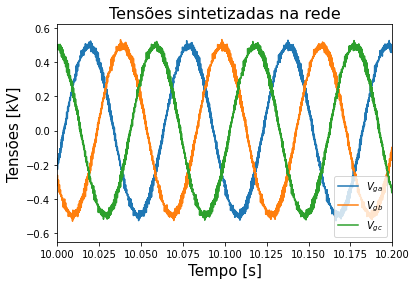

In [14]:
#instanciando a figura
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#definindo título do gráfico, dos eixos e setando o limite dos eixos 
ax.set_title('Tensões sintetizadas na rede', color='black', fontsize=16)
ax.set_ylabel('Tensões [kV]', color='black', fontsize=15)
ax.set_xlabel('Tempo [s]', color='black', fontsize=15)
ax.set_xlim([10,10.2])
ax.set_ylim(-0.65,0.62)

#plotagem dos gráficos
plt.plot(t,Vga,label='$V_{ga}$')
plt.plot(t,Vgb,label='$V_{gb}$')
plt.plot(t,Vgc,label='$V_{gc}$')
plt.legend(loc='lower right')
plt.savefig('tensoes_na_rede.png', format='png')
plt.show()

Um segundo exemplo:

In [15]:
link2 = 'https://drive.google.com/file/d/1vkp04RKy91rmAKN9wMm3RcqBbARTRBNJ/view' #link compartilhável até o /view
  
id2 = link2.split("/")[-2] 
  
downloaded2 = drive.CreateFile({'id':id2})  
downloaded2.GetContentFile('OTC_ramp_06.out') #nome do arquivo como consta no Google Drive

In [16]:
df2 = pd.read_csv('OTC_ramp_06.out', delim_whitespace=True)

df2.columns = ['t2', 'P_turb', 'T_turb', 'v_w', 'w_pu']

t2 = df2['t2'] #tempo
P_turb = df2['P_turb'] #tensão na fase a da rede
T_turb = df2['T_turb'] #tensão na fase b da rede

df2.head()

,t2,P_turb,T_turb,v_w,w_pu
0,0.0001,0.278883,0.418366,8.0,0.666612
1,0.0002,0.278890,0.418358,8.0,0.666651
2,0.0003,0.278913,0.418367,8.0,0.666689
3,0.0004,0.278934,0.418375,8.0,0.666726
4,0.0005,0.278955,0.418383,8.0,0.666764


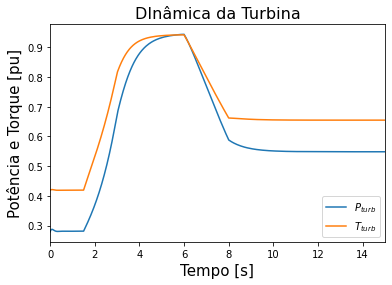

In [17]:
#instanciando a figura
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)

#definindo título do gráfico, dos eixos e setando o limite dos eixos 
ax2.set_title('DInâmica da Turbina', color='black', fontsize=16)
ax2.set_ylabel('Potência e Torque [pu]', color='black', fontsize=15)
ax2.set_xlabel('Tempo [s]', color='black', fontsize=15)
ax2.set_xlim([0,15])


#plotagem dos gráficos
plt.plot(t2,P_turb,label='$P_{turb}$')
plt.plot(t2,T_turb,label='$T_{turb}$')
plt.legend(loc='lower right')
plt.savefig('dinamica.png', format='png')
plt.show()